# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Hana Baron\\Projects\\JobTitleClassifier'

In [3]:
sns.set_style('white')
pd.set_option('max_colwidth',150)

In [4]:
df = pd.read_parquet('job_title_dataset.parquet')

In [5]:
df.shape

(1100, 4)

In [6]:
df.head(10)

,JobId,JobTitleId,JobTitle,Description
0,36126335,400878,Physical Therapist Assistant (PTA),<p>Looking for part-time PT&nbsp;for a quick growing and dynamic outpatient physical therapy clinic. Mentorship available and encouraged!&nbsp; Ou...
1,39345757,400720,Automotive Service Manager,"At David Maus Toyota, we strive to make every customer a customer for life.<br/> Happy employees make happy customers, and we reward individuals w..."
2,84331465,407973,Wastewater Project Manager,"<p>Position Summary:</p>\n<p>Project Management personnel are responsible for the overall safety, direction, completion, and financial outcome of ..."
3,88112060,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...
4,88112450,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...
5,88112460,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...
6,88112463,402654,Neonatal Nurse,"<p>$20,000 start date bonus!</p><p>Envision Physician Services is seeking a certified and experienced Neonatal Nurse Practitioner or Physician Ass..."
7,88114236,402654,Neonatal Nurse,"<p>Envision Physician Services is seeking a dynamic, board certified, Neonatal Nurse Practitioner Embassador to join our Women&rsquo;s and Childre..."
8,88114375,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...
9,105364828,402654,Neonatal Nurse,<p>Night Shift Neonatal Nurse Practitioner Opportunity in Level III NICU in Panama City! Envision Physician Services is seeking an experienced NNP...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobId        1100 non-null   object
 1   JobTitleId   1100 non-null   int32 
 2   JobTitle     1100 non-null   object
 3   Description  1099 non-null   object
dtypes: int32(1), object(3)
memory usage: 30.2+ KB


In [8]:
# remove nulls

df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobId        1099 non-null   object
 1   JobTitleId   1099 non-null   int32 
 2   JobTitle     1099 non-null   object
 3   Description  1099 non-null   object
dtypes: int32(1), object(3)
memory usage: 38.6+ KB


In [10]:
df[(df.Description == 'None') | (df.Description == '')]

,JobId,JobTitleId,JobTitle,Description


In [11]:
# count unique values for each column

def count_unique(data):
    for col in data.columns:
        print (f" In the '{col}' column there are: {data[col].nunique()} unique values")

In [12]:
count_unique(df)

 In the 'JobId' column there are: 1099 unique values
 In the 'JobTitleId' column there are: 51 unique values
 In the 'JobTitle' column there are: 51 unique values
 In the 'Description' column there are: 1099 unique values


In [13]:
# duplicates 

df[df.duplicated()]

,JobId,JobTitleId,JobTitle,Description


## Cleaning The Data

**Common data cleaning steps on all text:**

* Make text all lower case
* Remove punctuation
* Remove THML tags
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words


**More data cleaning steps after tokenization:**

* Stemming / lemmatization
* Create bi-grams or tri-grams
* Deal with typos

In [14]:
print('raw dataset: {}'.format(len(df.Description.iloc[0])))
df.Description.iloc[0]

raw dataset: 2122


"<p>Looking for part-time PT&nbsp;for a quick growing and dynamic outpatient physical therapy clinic. Mentorship available and encouraged!&nbsp; Our clinic focuses on manual therapy and exercise in a well equipped clinic with the latest equipment and modalities. We take an active approach to rehabilitation and always take the time to care. Our clinic offers personalized physical therapy in a warm and caring environment. Every day is a positive day at Andrew PT! Very manageable daily case load of 8-10 patients per day so you can spend the quality time with patients that makes work and life enjoyable!&nbsp; On a separate note, we&nbsp;also have all the necessary equipment and private treatment room for a women's health&nbsp;program if you have those clinical skills or interest.</p> <p>Our clinic is cutting edge and is even solar powered. Large vaulted ceiling workout area and 9 personalized treatment rooms with the clinic spanning 4,000 square feet total. Our clinic is located in McMinnv

In [15]:
# pip install nltk

In [16]:
# Apply a first round of text cleaning techniques

import re
import string
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

def text_process(text):
    """
    1. make text lowercase
    2. remove html tags
    3. remove punctuation 
    4. remove words containing numbers
    5. return set of clean text words
    """
    
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = BeautifulSoup(text).get_text()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] 
    text = list(set(text))
    
    return text

round1 = lambda x: text_process(x)

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Hana
[nltk_data]     Baron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hana
[nltk_data]     Baron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
# from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
print('raw dataset: {}'.format(len(text_process(df['Description'][0]))))
text_process(df['Description'][0])

raw dataset: 156


['daily',
 'patients',
 'womens',
 'start',
 'feet',
 'available',
 'approach',
 'necessary',
 'continued',
 'exercise',
 'located',
 'licensing',
 'focuses',
 'dpt',
 'room',
 'growing',
 'experience',
 'beach',
 'large',
 'take',
 'based',
 'andrew',
 'medical',
 'note',
 'environment',
 'clinical',
 'wwwandrewptcom',
 'wks',
 'new',
 'resume',
 'dynamic',
 'hiking',
 'weeks',
 'manageable',
 'fee',
 'life',
 'load',
 'care',
 'motivated',
 'outpatient',
 'treatment',
 'skills',
 'holidays',
 'interest',
 'continuing',
 'powered',
 'rehabilitation',
 'rooms',
 'employee',
 'graduates',
 'mentorship',
 'ingredients',
 'time',
 'vacation',
 'equipped',
 'mountains',
 'including',
 'fax',
 'personalized',
 'work',
 'situated',
 'matching',
 'company',
 'paid',
 'within',
 'via',
 'clinicians',
 'parttime',
 'welcome',
 'spend',
 'encouraged',
 'learning',
 'benefits',
 'case',
 'happy',
 'yearly',
 'program',
 'may',
 'looking',
 'cycling',
 'believe',
 'spanning',
 'modalities',
 'per'

In [21]:
# Let's take a look at the updated text
df['Desc'] = pd.DataFrame(df.Description.apply(round1))
df.head()

,JobId,JobTitleId,JobTitle,Description,Desc
0,36126335,400878,Physical Therapist Assistant (PTA),<p>Looking for part-time PT&nbsp;for a quick growing and dynamic outpatient physical therapy clinic. Mentorship available and encouraged!&nbsp; Ou...,"[daily, patients, womens, start, feet, available, approach, necessary, continued, exercise, located, licensing, focuses, dpt, room, growing, exper..."
1,39345757,400720,Automotive Service Manager,"At David Maus Toyota, we strive to make every customer a customer for life.<br/> Happy employees make happy customers, and we reward individuals w...","[daily, reward, customers, others, drive, plus, phone, person, customer, absolutely, owner, experience, ready, award, take, willing, critical, dav..."
2,84331465,407973,Wastewater Project Manager,"<p>Position Summary:</p>\n<p>Project Management personnel are responsible for the overall safety, direction, completion, and financial outcome of ...","[promote, budget, labor, subject, forecast, others, termination, preferred, initial, ongoing, must, special, curriculum, requirements, customer, t..."
3,88112060,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...,"[infrastructure, contracts, region’s, continued, metroplex, caremedical, mfm, several, physician, areas, alliance, tail, based, dedicated, medical..."
4,88112450,402654,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...,"[premature, infrastructure, treat, contracts, region’s, continued, metroplex, caremedical, mfm, unit, ages, several, physician, areas, tail, based..."


In [22]:
# before cleaning

df.Description[1080]

'<div dir="ltr"> </div><br><br><div dir="ltr"><br><div dir="ltr"><br><div><br><div><br><div><br><p><span style="font-size:12pt"><span style="background:white"><span style="vertical-align:baseline"><span style="font-family:Calibri,sans-serif"><b><span style="border:none windowtext 1.0pt; font-size:11.0pt; padding:0in"><span style="font-family:&amp;quot;Times New Roman&amp;quot;,serif"><span style="color:black">Software Engineer AdTech</span></span></span></b></span></span></span></span></p><br><br><p> </p><br'

In [23]:
# after cleaning

df.Desc[1080]

['software', 'engineer', 'adtech']

In [24]:
df['DescLength'] = df.Desc.apply(len)
df['DescriptionLength'] = df.Description.apply(len)

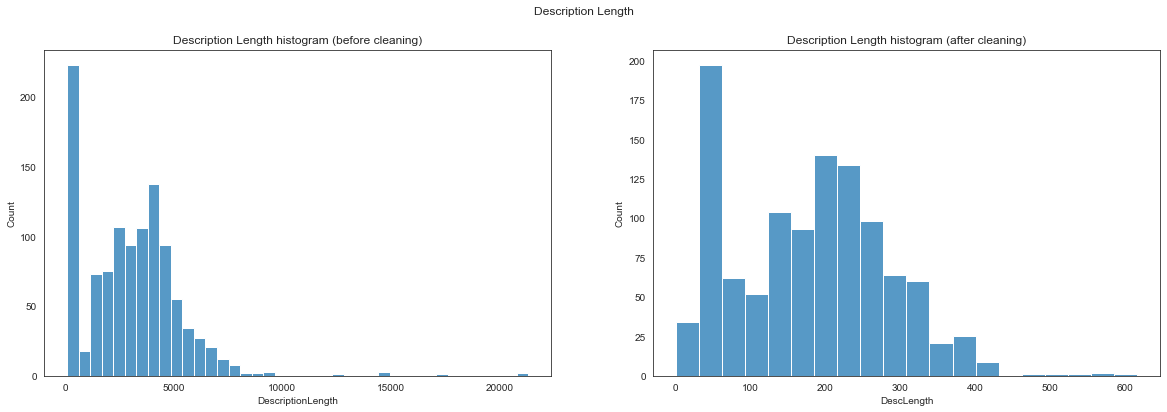

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

# both subplots title
fig.suptitle('Description Length')

# plot1 object
sns.histplot(df['DescriptionLength'],ax=axes[0])
axes[0].set_title('Description Length histogram (before cleaning)')

# plot2 object
sns.histplot(df['DescLength'],ax=axes[1])
axes[1].set_title('Description Length histogram (after cleaning)')

# show plot
plt.show()

In [26]:
df[df.DescLength < 50].sort_values(by='DescLength').head()

,JobId,JobTitleId,JobTitle,Description,Desc,DescLength,DescriptionLength
999,488111533,404170,Proctor,"<div><div data-bind=""css: $component.getBlockCellCss($data, 0)"" class=""block__cell block__field--wide-rich-text"" style=""font-family: &quot;Open Sa...",[],0,512
275,197842631,100462,Medical Laboratory Technician (MLT),"<p style=""margin: 0px;"">x</p><br><p style=""margin: 0px;"">x</p><br><p style=""margin: 0px;"">x</p>",[xxx],1,95
1080,496707274,21,Software Engineer,"<div dir=""ltr""> </div><br><br><div dir=""ltr""><br><div dir=""ltr""><br><div><br><div><br><div><br><p><span style=""font-size:12pt""><span style=""backgr...","[software, engineer, adtech]",3,512
984,485094592,21,Software Engineer,"<html><body><p><span style=""font-family: arial, helvetica, sans-serif; font-size: 11pt;""><b><span style=""text-decoration: none;"">TITLE</span></b><...","[remote, software, location, engineer, title]",5,512
1081,496707802,21,Software Engineer,"<p><span style=""font-size:11pt""><span style=""font-family:Calibri,sans-serif""><b><span style=""font-family:&amp;quot;Cambria&amp;quot;,&amp;quot;ser...","[software, type, nnjob, employment, contract, engineer, title]",7,512


In [27]:
df.loc[999,'Description'] 

'<div><div data-bind="css: $component.getBlockCellCss($data, 0)" class="block__cell block__field--wide-rich-text" style="font-family: &quot;Open Sans&quot;, &quot;Segoe UI&quot;, Frutiger, &quot;Frutiger Linotype&quot;, &quot;Dejavu Sans&quot;, &quot;Helvetica Neue&quot;, Arial, sans-serif; font-size: 13.02px; padding: 0px 25px 0px 0px; margin: 10px 0px 0px; width: 961.667px; box-sizing: border-box;"><div data-bind="attr: {id: $data.name + \'-container\',\n        class:(\n        $data.displayType === \'InputTex'

In [28]:
df.loc[275,'Description'] 

'<p style="margin: 0px;">x</p><br><p style="margin: 0px;">x</p><br><p style="margin: 0px;">x</p>'

In [29]:
df[df.DescriptionLength <100].head()

,JobId,JobTitleId,JobTitle,Description,Desc,DescLength,DescriptionLength
275,197842631,100462,Medical Laboratory Technician (MLT),"<p style=""margin: 0px;"">x</p><br><p style=""margin: 0px;"">x</p><br><p style=""margin: 0px;"">x</p>",[xxx],1,95


In [30]:
# removing rows with no valid text in the Description 

df.drop(df[(df.DescriptionLength < 100)|(df.DescLength < 3)].index, inplace=True)

In [31]:
# looks like we were able to clean a lot of unnecessary text

df.describe()

,JobTitleId,DescLength,DescriptionLength
count,1097.000000,1097.000000,1097.000000
mean,260940.872379,179.481313,3110.663628
std,190654.543678,103.711673,2184.767587
min,21.000000,3.000000,281.000000
25%,21.000000,86.000000,1484.000000
50%,400832.000000,188.000000,3034.000000
75%,402654.000000,251.000000,4277.000000
max,410520.000000,616.000000,21330.000000


## lemmatization

In [32]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

test = df.loc[0,'Desc']

lemmatized = [lemmatizer.lemmatize(w) for w in test]

print(len((set(lemmatized))))

lemmatized

155


['daily',
 'patient',
 'woman',
 'start',
 'foot',
 'available',
 'approach',
 'necessary',
 'continued',
 'exercise',
 'located',
 'licensing',
 'focus',
 'dpt',
 'room',
 'growing',
 'experience',
 'beach',
 'large',
 'take',
 'based',
 'andrew',
 'medical',
 'note',
 'environment',
 'clinical',
 'wwwandrewptcom',
 'wks',
 'new',
 'resume',
 'dynamic',
 'hiking',
 'week',
 'manageable',
 'fee',
 'life',
 'load',
 'care',
 'motivated',
 'outpatient',
 'treatment',
 'skill',
 'holiday',
 'interest',
 'continuing',
 'powered',
 'rehabilitation',
 'room',
 'employee',
 'graduate',
 'mentorship',
 'ingredient',
 'time',
 'vacation',
 'equipped',
 'mountain',
 'including',
 'fax',
 'personalized',
 'work',
 'situated',
 'matching',
 'company',
 'paid',
 'within',
 'via',
 'clinician',
 'parttime',
 'welcome',
 'spend',
 'encouraged',
 'learning',
 'benefit',
 'case',
 'happy',
 'yearly',
 'program',
 'may',
 'looking',
 'cycling',
 'believe',
 'spanning',
 'modality',
 'per',
 'sharing',
 

In [33]:
words = ['run', 'running', 'ran','go', 'going', 'goes', 'went']

In [34]:
[lemmatizer.lemmatize(w) for w in words]

['run', 'running', 'ran', 'go', 'going', 'go', 'went']

## Stemming

In [35]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemming = PorterStemmer()
stemming = [stemming.stem(w) for w in test]
print(len(set(stemming)))
stemming

150


['daili',
 'patient',
 'women',
 'start',
 'feet',
 'avail',
 'approach',
 'necessari',
 'continu',
 'exercis',
 'locat',
 'licens',
 'focus',
 'dpt',
 'room',
 'grow',
 'experi',
 'beach',
 'larg',
 'take',
 'base',
 'andrew',
 'medic',
 'note',
 'environ',
 'clinic',
 'wwwandrewptcom',
 'wk',
 'new',
 'resum',
 'dynam',
 'hike',
 'week',
 'manag',
 'fee',
 'life',
 'load',
 'care',
 'motiv',
 'outpati',
 'treatment',
 'skill',
 'holiday',
 'interest',
 'continu',
 'power',
 'rehabilit',
 'room',
 'employe',
 'graduat',
 'mentorship',
 'ingredi',
 'time',
 'vacat',
 'equip',
 'mountain',
 'includ',
 'fax',
 'person',
 'work',
 'situat',
 'match',
 'compani',
 'paid',
 'within',
 'via',
 'clinician',
 'parttim',
 'welcom',
 'spend',
 'encourag',
 'learn',
 'benefit',
 'case',
 'happi',
 'yearli',
 'program',
 'may',
 'look',
 'cycl',
 'believ',
 'span',
 'modal',
 'per',
 'share',
 'coverag',
 'perfectli',
 'privat',
 'inform',
 'cut',
 'therapi',
 'pt',
 'quick',
 'well',
 'therapist'

In [36]:
stem = PorterStemmer()
[stem.stem(w) for w in words]

['run', 'run', 'ran', 'go', 'go', 'goe', 'went']

In [37]:
comparing_df = pd.DataFrame(test,columns=['original'])
comparing_df['stemming'] = stemming
comparing_df['lemmatization'] = lemmatized
comparing_df.drop_duplicates().head(20)

,original,stemming,lemmatization
0,daily,daili,daily
1,patients,patient,patient
2,womens,women,woman
3,start,start,start
4,feet,feet,foot
5,available,avail,available
6,approach,approach,approach
7,necessary,necessari,necessary
8,continued,continu,continued
9,exercise,exercis,exercise


## Create bi-grams or tri-grams

## Deal with typos

## Word2Vec

### trained gensim.models.Word2Vec with df['Desc'], created a visualization,reduced the dimantion with PCA to 15 and created a new dataframe with the new 15 features and the original dataframe.

#### Train

In [38]:
import gensim.models
corpus = df['Desc']
model = gensim.models.Word2Vec(corpus)

C:\Users\Hana Baron\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [39]:
vec_king = model.wv['software']
vec_king

array([-1.4677182 ,  1.0275838 ,  1.6432317 , -0.2533131 , -0.98018676,
       -0.7195288 ,  1.0905493 ,  0.22910966, -0.6275907 ,  1.3480854 ,
        0.33476415, -0.41268885, -2.2222226 ,  0.4064716 ,  0.30450192,
       -1.5355345 ,  0.67941976, -0.01886539, -0.08165357, -1.5471272 ,
       -0.52089554, -0.01141913, -1.3156247 , -0.6011128 , -3.2778327 ,
       -1.2290328 ,  1.172476  , -1.5684699 , -0.8821566 ,  1.604491  ,
        1.0419468 ,  1.2631539 , -0.20332736, -1.1259854 , -0.1423438 ,
        1.095925  , -0.31379157, -0.4488196 ,  0.2814836 , -0.87263936,
       -0.10763569, -0.06851476, -1.2234577 , -0.5324092 , -0.38285306,
       -0.31286356, -1.4582105 , -0.25240928,  0.54566914,  0.15022701,
       -0.38511425, -0.73379827,  1.1099957 ,  1.2221371 , -2.1114662 ,
        0.1170034 ,  1.1523168 ,  0.1528679 , -1.3559135 , -0.516246  ,
       -0.81837326, -0.14979246, -0.11447559,  0.39068675,  0.4389904 ,
        1.3270756 , -0.33122364,  0.7083219 ,  0.15955679, -0.35

In [40]:
model.wv.index_to_key

['team',
 'work',
 'experience',
 'provide',
 'years',
 'services',
 'us',
 'new',
 'skills',
 'company',
 'development',
 'including',
 'looking',
 'job',
 'time',
 'one',
 'information',
 'status',
 'working',
 'business',
 'join',
 'environment',
 'degree',
 'position',
 'responsibilities',
 'required',
 'management',
 'quality',
 'related',
 'responsible',
 'opportunity',
 'professional',
 'benefits',
 'develop',
 'service',
 'disability',
 'support',
 'process',
 'also',
 'vision',
 'make',
 'high',
 'software',
 'national',
 'care',
 'people',
 'training',
 'help',
 'ability',
 'role',
 'knowledge',
 'applicants',
 'data',
 'application',
 'systems',
 'medical',
 'plan',
 'design',
 'orientation',
 'strong',
 'well',
 'build',
 'communication',
 'race',
 'best',
 'sexual',
 'origin',
 'religion',
 'organization',
 'gender',
 'providing',
 'color',
 'equal',
 'veteran',
 'within',
 'day',
 'technical',
 'across',
 'requirements',
 'employer',
 'product',
 'andor',
 'employment',
 

In [41]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print("index is " , index, "word is ", word)

index is  0 word is  team
index is  1 word is  work
index is  2 word is  experience
index is  3 word is  provide
index is  4 word is  years
index is  5 word is  services
index is  6 word is  us
index is  7 word is  new
index is  8 word is  skills
index is  9 word is  company


In [42]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in words if word in model.wv.index_to_key]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.wv.index_to_key]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df_vec = pd.DataFrame.from_dict(word_vec_dict, orient='index')

#### Visualization

In [43]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

C:\Users\Hana Baron\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


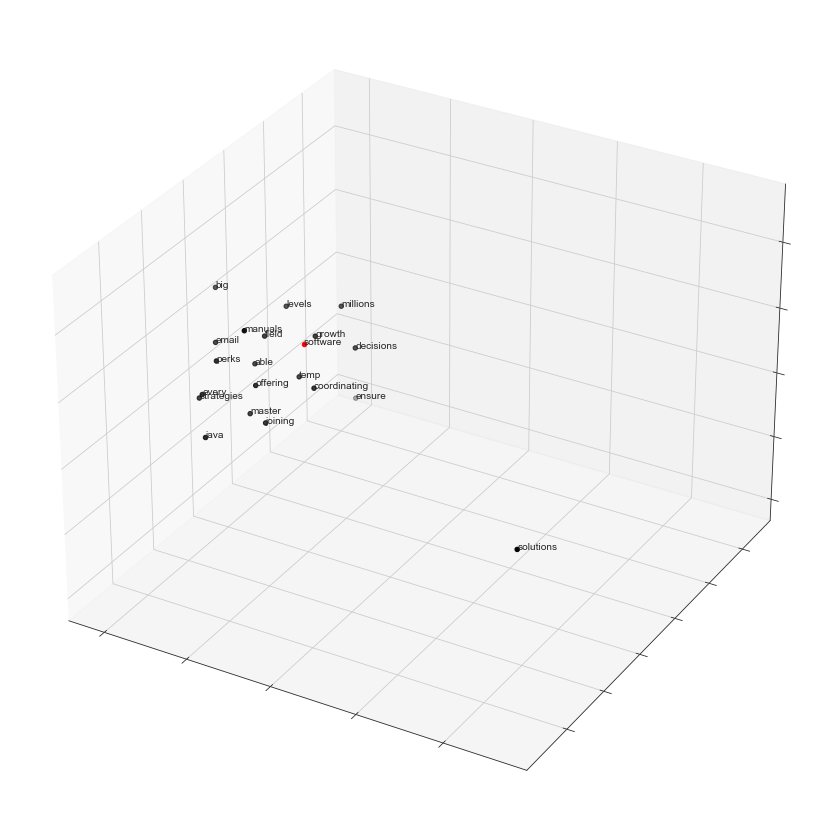

In [45]:
######visualization of word2vec
# %matplotlib inline  
# %matplotlib ipympl
# %matplotlib notebook
# %pylab

word = "software"
fig = plt.figure(figsize = (15,15))
## word embedding
tot_words = [word] + [tupla[0] for tupla in model.wv.most_similar(word, topn=20)]
X = model.wv[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)
# ax.mouse_init()

#### Reducing dimantions with PCA and creating new dataframe

In [46]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.wv.index_to_key for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [47]:
# Remove docs that don't include any words in W2V's vocab
corpus, desc_list = filter_docs(corpus, df['Desc'], lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, desc_list = filter_docs(corpus, desc_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

0 docs removed
0 docs removed


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, random_state=10)

# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(x)
df_w_vectors = pd.DataFrame(reduced_vecs)

# Compose dataframe 
df_w_vectors['Desc'] = df['Desc']
# Use pd.concat to match original titles with their vectors
main_w_vectors = pd.concat((df_w_vectors, df), axis=1)

# Get rid of vectors that couldn't be matched with the main_df
main_w_vectors.dropna(axis=0, inplace=True)

In [49]:
main_w_vectors

,0,1,2,3,4,5,6,7,8,9,...,13,14,Desc,JobId,JobTitleId,JobTitle,Description,Desc,DescLength,DescriptionLength
0,0.135575,-0.163634,0.070889,-0.114294,-0.184705,-0.045648,-0.130499,-0.054187,0.151109,0.038041,...,0.026602,-0.017073,"[daily, patients, womens, start, feet, available, approach, necessary, continued, exercise, located, licensing, focuses, dpt, room, growing, exper...",36126335,400878.0,Physical Therapist Assistant (PTA),<p>Looking for part-time PT&nbsp;for a quick growing and dynamic outpatient physical therapy clinic. Mentorship available and encouraged!&nbsp; Ou...,"[daily, patients, womens, start, feet, available, approach, necessary, continued, exercise, located, licensing, focuses, dpt, room, growing, exper...",156.0,2122.0
1,0.186135,-0.169038,-0.107762,0.059162,-0.301213,0.005458,-0.182807,0.090380,0.068573,-0.013640,...,0.068030,0.091233,"[daily, reward, customers, others, drive, plus, phone, person, customer, absolutely, owner, experience, ready, award, take, willing, critical, dav...",39345757,400720.0,Automotive Service Manager,"At David Maus Toyota, we strive to make every customer a customer for life.<br/> Happy employees make happy customers, and we reward individuals w...","[daily, reward, customers, others, drive, plus, phone, person, customer, absolutely, owner, experience, ready, award, take, willing, critical, dav...",114.0,1585.0
2,-0.159457,-0.082710,0.055185,-0.011303,-0.160043,-0.040891,0.089030,0.055312,-0.154705,0.091309,...,-0.023952,0.019026,"[promote, budget, labor, subject, forecast, others, termination, preferred, initial, ongoing, must, special, curriculum, requirements, customer, t...",84331465,407973.0,Wastewater Project Manager,"<p>Position Summary:</p>\n<p>Project Management personnel are responsible for the overall safety, direction, completion, and financial outcome of ...","[promote, budget, labor, subject, forecast, others, termination, preferred, initial, ongoing, must, special, curriculum, requirements, customer, t...",211.0,3306.0
3,0.508757,-0.476195,0.039282,-0.117875,0.166040,-0.100619,-0.024396,0.046001,0.132605,0.025022,...,0.000090,-0.007831,"[infrastructure, contracts, region’s, continued, metroplex, caremedical, mfm, several, physician, areas, alliance, tail, based, dedicated, medical...",88112060,402654.0,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...,"[infrastructure, contracts, region’s, continued, metroplex, caremedical, mfm, several, physician, areas, alliance, tail, based, dedicated, medical...",132.0,1850.0
4,0.558009,-0.429677,0.035023,-0.102437,0.133215,-0.031504,-0.033007,0.045823,0.122427,0.012132,...,0.000051,-0.017975,"[premature, infrastructure, treat, contracts, region’s, continued, metroplex, caremedical, mfm, unit, ages, several, physician, areas, tail, based...",88112450,402654.0,Neonatal Nurse,<p>Envision Physician Services is seeking a Neonatal Nurse Practitioner to join our busy practice covering 7 Medical City facilities in the DFW ar...,"[premature, infrastructure, treat, contracts, region’s, continued, metroplex, caremedical, mfm, unit, ages, several, physician, areas, tail, based...",142.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,-0.845520,-0.805747,0.155044,0.029433,0.015495,0.064318,-0.110844,0.043812,-0.190904,-0.069239,...,0.079305,-0.000152,"[programs, patients, rehabilitation, assisted, ccrcs, occupational, therapy, transitional, us, throughout, rehab, hospitals, therapist, hiring, ol...",500885340,400878.0,Physical Therapist Assistant (PTA),"<p>PART TIME POSITION 20 hours</p>\n<p>Genesis Rehab Services is a leading provider of Physical, Occupational, Speech and Respiratory Therapy for ...","[programs, patients, rehabilitation, assisted, ccrcs, occupational, therapy, transitional, us, throughout, rehab, hospitals, therapist, hiring, ol...",45.0,512.0
1093,-0.90696

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Description'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
bow_transformer.vocabulary_

In [ ]:
desc4 = df['Description'][3]

In [ ]:
print(desc4)

In [ ]:
bow4 = bow_transformer.transform([desc4])

In [ ]:
print('shape: ',bow4.shape)
print(bow4)

In [ ]:
bow_transformer.get_feature_names()[168]

In [ ]:
desc_bow = bow_transformer.transform(df['Description'])

In [ ]:
print('Shape of Sparse Matrix: ', desc_bow.shape)

In [ ]:
desc_bow.nnz

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(desc_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [ ]:
print(tfidf4)

In [ ]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['salary']]

In [ ]:
desc_tfidf = tfidf_transformer.transform(desc_bow)

## Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB().fit(desc_tfidf, df['JobTitle'])

In [ ]:
nb_model.predict(tfidf4)[0]

In [ ]:
df.iloc[[3],:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['JobTitle'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [ ]:
pipline.fit(X_train,y_train)

In [ ]:
predictions = pipline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [ ]:
pipline.fit(X_train,y_train)

In [ ]:
predictions = pipline.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
df.JobTitle.value_counts()